## KNeighbors Regressor 

In [1]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Import Data
#data = pd.read_csv('data/data_encod.csv', index_col=[0])
#data = pd.read_csv('data/train_771.csv', index_col=[0])
data = pd.read_csv('data/data_729.csv', index_col=[0])
train=data[data.target.notnull()].reset_index(drop=True)
test=data[data.target.isna()].reset_index(drop=True)

print(f'Data: {data.shape}')
print(f'Train: {train.shape}') #(15539, 44)
print(f'Test: {test.shape}')

Data: (20574, 729)
Train: (15539, 729)
Test: (5035, 729)


In [3]:
# select only Location D
train = train[(train['location']== 'D')]
train.shape

(4990, 729)

In [4]:
#fillna
train = train.fillna(train.mean())

/var/folders/gz/t1kyprv95tzc2bf6b375z94h0000gn/T/ipykernel_2699/361421783.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.fillna(train.mean())


In [5]:
train.head()

,ID,location,target,newtemp0,newprecip0,newrel_humidity0,newwind_dir0,windspeed0,atmospherepressure0,newtemp1,...,newrel_humidity119,newwind_dir119,windspeed119,atmospherepressure119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120
1,ID_train_1,D,79.131702,22.533333,0.102,0.744583,281.664310,2.377500,90.320000,21.716667,...,0.649250,73.528733,1.475833,90.439167,21.450000,0.561,0.797333,296.967254,1.019167,90.529167
10,ID_train_10005,D,55.638261,19.400000,0.000,0.927500,30.343767,0.348333,90.788333,18.991667,...,0.759167,178.252679,0.896736,90.555833,20.491667,0.000,0.779958,177.704952,0.897390,90.531667
13,ID_train_10008,D,32.240851,27.808333,0.000,0.753917,153.221930,1.095000,90.427500,29.108333,...,0.786333,101.535318,1.511667,90.554167,22.083333,2.229,0.915818,331.308648,1.970000,90.527500
15,ID_train_1001,D,72.717021,18.558333,0.000,0.939417,173.238391,0.380000,90.659167,19.266667,...,0.871250,270.524749,0.454167,90.512500,19.716667,0.000,0.905083,231.191039,0.388333,90.477500
22,ID_train_10016,D,35.833571,28.841667,0.000,0.592167,321.349677,0.350833,90.260000,26.475000,...,0.666833,178.252679,0.896736,90.239167,26.850000,0.000,0.642583,177.704952,0.897390,90.217500


In [6]:
columns_to_drop = ['target', 'ID', 'location']
# define features and target
X = train.drop(columns_to_drop, axis=1)
y = train.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (4990, 726)
y: (4990,)
X_train: (3493, 726)
y_train: (3493,)
X_test: (1497, 726)
y_test: (1497,)


In [7]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [8]:
# Instantiate our model 
knr = KNeighborsRegressor()

# Train the model using our data
knr.fit(X_train, y_train)


# predict
y_pred_train = knr.predict(X_train)
y_pred_test = knr.predict(X_test)

RSME _ train: 24.70
RSME _ test: 32.02


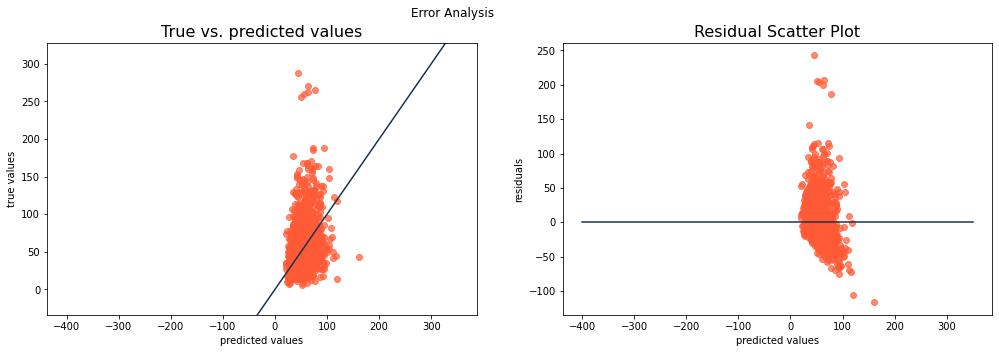

In [9]:
rsme_knr_train = rmse(y_train, y_pred_train )
rsme_knr_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_knr_train:.2f}')
print(f'RSME _ test: {rsme_knr_test:.2f}')

# error analysis train:
error_analysis(y_test, y_pred_test)

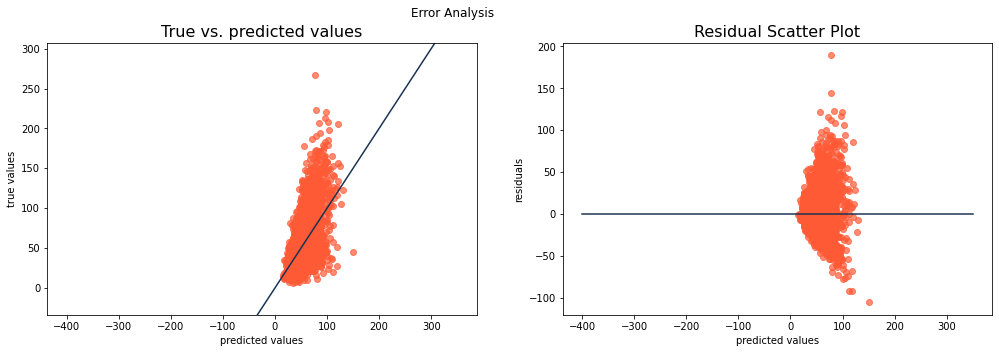

In [10]:
# error analysis train:
error_analysis(y_train, y_pred_train)